In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from tqdm.notebook import tqdm_notebook

In [2]:
df = pd.read_csv("../input/chocolate-bar-ratings/flavors_of_cacao.csv",header=None,names= ["Company","Specific Bean Originor","REF","Review Date", "Cocoa Percent","Company Location","rating","Bean Type","Broad Bean Origin"])

In [3]:
df.head()

,Company,Specific Bean Originor,REF,Review Date,Cocoa Percent,Company Location,rating,Bean Type,Broad Bean Origin
0,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
1,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
3,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
4,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo


In [4]:
df.drop(df.index[0],axis = 0,inplace=True)

In [5]:
df.isnull().sum()

Company                   0
Specific Bean Originor    0
REF                       0
Review Date               0
Cocoa Percent             0
Company Location          0
rating                    0
Bean Type                 1
Broad Bean Origin         1
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
def type_cast(df,column,type):
    return df[column].astype(type)

In [8]:
def mean_encoding(df,x,y):
    mean_encoder=ce.TargetEncoder()
    df = mean_encoder.fit_transform(df[x],df[y])
    return df

In [9]:
def clean_rating(df):
    df["rating"] = type_cast(df,"rating","float")

In [10]:
def clean_Specific_Bean_Originor(df):
    df_Bean_Originor = mean_encoding(df,"Specific Bean Originor","rating")
    df['Specific Bean Originor'] = df_Bean_Originor['Specific Bean Originor'].round(3)

In [11]:
def clean_REF(df):
    df["REF"] = type_cast(df,"REF","int")

In [12]:
def clean_Cocoa_Percent(df):
    df['Cocoa Percent'] =df['Cocoa Percent'].map(lambda x: x.replace("%", ""))
    df['Cocoa Percent'] = type_cast(df,"Cocoa Percent","float")

In [13]:
def clean_Company_Location(df):
    df_Company_Location = mean_encoding(df,"Company Location","rating")
    df['Company Location'] = df_Company_Location['Company Location'].round(3)

In [14]:
def clean_Bean_Type(df):
    empty_value = df["Bean Type"].values[0]
    def replace_nan(value):
        if value == empty_value:
            return "Unknown"
        else:
            return value
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = df[col].apply(lambda value: replace_nan(value))
    df_Bean_Type = mean_encoding(df,"Bean Type","rating")
    df["Bean Type"] = df_Bean_Type["Bean Type"].round(3)

In [15]:
def clean_Broad_Bean_Origin(df):
    df_Broad_Bean_Origin = mean_encoding(df,"Broad Bean Origin","rating")
    df["Broad Bean Origin"] = df_Broad_Bean_Origin["Broad Bean Origin"].round(3)

In [16]:
columns = ["Company","Review Date"]
def columns_to_drop(df,columns):
    df_final = df.drop(columns,axis = 1)
    return df_final

In [1]:
def preprocess_data(df):
    clean_rating(df)
    clean_Specific_Bean_Originor(df)
    clean_REF(df)
    clean_Cocoa_Percent(df)
    clean_Company_Location(df)
    clean_Bean_Type(df)
    clean_Broad_Bean_Origin(df)
    df_final = columns_to_drop(df,columns)
    return df_final

In [18]:
df_final = preprocess_data(df)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [19]:
df_final.dtypes

Specific Bean Originor    float64
REF                         int64
Cocoa Percent             float64
Company Location          float64
rating                    float64
Bean Type                 float64
Broad Bean Origin         float64
dtype: object

In [20]:
scale_X=MinMaxScaler()
scale_Y=MinMaxScaler()
X = df_final.drop(["rating"],axis =1)
Y = df_final['rating']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 27)
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.fit_transform(X_test)
Y_train = scale_Y.fit_transform(np.array(Y_train).reshape(-1, 1)).squeeze()
Y_test = scale_Y.fit_transform(np.array(Y_test).reshape(-1, 1)).squeeze()


In [21]:
#class ofr sigmoid neuron:
class sigmoidNeuron:
  def __init__(self):
    self.w=None
    self.b=None 
  def pereceptron(self,x):
    return np.dot(self.w,x.T)+self.b
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.pereceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.pereceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  def fit(self,X,Y,epochs=1,learning_rate=1,ini=False,display_loss=False):

    if ini:
        self.w=np.random.randn(1,X.shape[1])
        self.b=0
    if display_loss:
      loss={}


    for i in range(epochs):
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y)
        db+=self.grad_b(x,y)
      self.w-=learning_rate*dw
      self.b-=learning_rate*db
      if display_loss:
        y_pred=self.sigmoid(self.pereceptron(X))
        loss[i]=mean_squared_error(Y,y_pred.squeeze())
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('epochs')
      plt.ylabel('loss')
      plt.show()
      

  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.sigmoid(self.pereceptron(x))
      Y_pred.append(y_pred)

    return Y_pred
      #number of updates is eual to numbrr of epochs


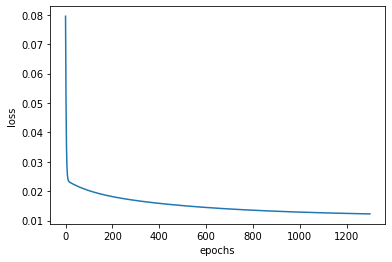

In [22]:
sn=sigmoidNeuron()
sn.fit(X_train,Y_train,1300,0.001,ini = True,display_loss=True)

In [23]:
sn.w

array([[ 0.69550762,  0.0947612 , -0.37513011,  0.34657497,  0.66017258,
        -0.32463164]])

In [24]:
sn.b

array([-0.28814239])

In [25]:
Y_pred = np.array(sn.predict(X_test)).squeeze()

In [26]:
mean_squared_error(Y_test,Y_pred)

0.04075193398645394

In [27]:
r2_score(Y_test,Y_pred)

-0.6479463718583056

In [28]:
class FFSNNetwork:
  def __init__(self,n_inputs,n_outputs=1,hidden_sizes=[2]):
    self.nx=n_inputs
    self.ny=n_outputs
    self.nh=len(hidden_sizes)
    #self.sizes reffer to size of each layer (ie) 
    self.sizes=[self.nx]+hidden_sizes+[self.ny]
    self.W={}
    self.B={}
    for i in range(self.nh+1):
      self.W[i+1]=np.random.randn(self.sizes[i],self.sizes[i+1])
      self.B[i+1]=np.zeros((1,self.sizes[i+1]))
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def forward_pass(self,x):
    self.A={}
    self.H={}
    self.H[0]=x.reshape(1,-1)
    for i in range(self.nh+1):
      self.A[i+1]=np.matmul(self.H[i],self.W[i+1]+self.B[i+1])
      self.H[i+1]=self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]
  def grad_sigmoid(self, x):
    return x*(1-x) 
    
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))

  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
    if display_loss:
      loss = {}
    
    for j in range(epochs):

      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
        
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[j] = mean_squared_error(Y_pred, Y)
        
    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
 

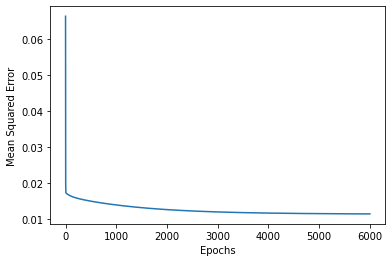

In [29]:
ffsnn = FFSNNetwork(6, hidden_sizes=[10])
ffsnn.fit(X_train, Y_train, epochs=6000, learning_rate=.001, display_loss=True)

In [30]:
ffsnn.W

{1: array([[-0.02832583, -0.45693147, -0.87111654, -0.77031625, -1.8881121 ,
         -0.73154934, -0.73451996,  0.81258378,  1.24864847,  0.46207488],
        [ 0.33787233, -0.50848578, -2.11618252, -0.99771391,  0.79576335,
         -0.86376921,  1.03281739,  1.46328119,  0.17196844, -2.13155175],
        [-1.22989854, -0.34753164, -0.16807344,  1.04110392, -0.76232334,
         -1.07128425,  0.60443836, -1.0218897 , -0.21094618,  1.00315006],
        [ 0.37582734,  0.5738027 , -0.84520185, -0.86701051, -1.39531425,
         -0.99635736, -0.34738281, -1.51688285, -2.29920589, -0.39793178],
        [ 1.29659061,  0.13306994,  0.74169257, -0.58963995, -0.35258073,
         -0.43376619, -0.94042069, -1.77126045, -0.09813872,  0.33889938],
        [ 0.39011012, -1.44274074, -0.24096619,  1.46137081, -0.13469276,
          0.39882871,  0.08100101,  0.02335547, -0.66245493,  1.48735337]]),
 2: array([[ 1.83240819],
        [-1.51074902],
        [-0.72918939],
        [-1.30512417],
      

In [31]:
Y_pred_train=ffsnn.predict(X_train)
Y_pred_val=ffsnn.predict(X_test)
r2_train=r2_score(Y_train,Y_pred_train)
r2_val=r2_score(Y_test,Y_pred_val)

In [32]:
mse_train=mean_squared_error(Y_train,Y_pred_train)
mse_val=mean_squared_error(Y_test,Y_pred_val)

In [33]:
rmse_train=np.sqrt(mean_squared_error(Y_train,Y_pred_train))
rmse_val=np.sqrt(mean_squared_error(Y_test,Y_pred_val))

In [34]:
print("R2 Score - train",r2_train)
print("R2 Score - val",r2_val)
print("MSE Score - train",mse_train)
print("MSE Score - val",mse_val)
print("RMSE Score - train",rmse_train)
print("RMSE Score - val",rmse_val)

R2 Score - train 0.20935060028417984
R2 Score - val -0.16365911448069737
MSE Score - train 0.011352225628810428
MSE Score - val 0.02877603314395369
RMSE Score - train 0.10654682364486719
RMSE Score - val 0.1696349997611156
